

# <h> 1. Load and Explore Data </h>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [301]:
#We will use sklearn, pandas and numpy libraries

df1= pd.read_csv('train.csv')


df1.shape


(750000, 12)

# Descriptive Stats

Train

In [ ]:
df1.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [ ]:
df1.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [ ]:
df1.isnull().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,87093
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,146030
Number_of_Ads,1


In [ ]:
average =df1['Episode_Length_minutes'].mean()

print(average)

64.50473835100327


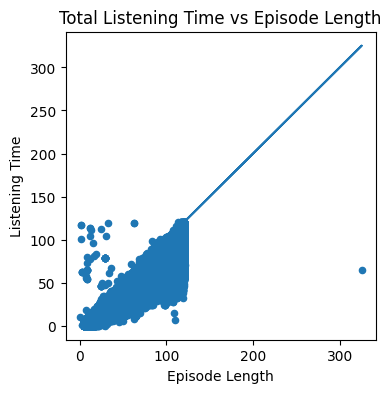

In [ ]:
#Run a Scatter Plot to check for outliers before applying mean or median fill
#plot the fitting line
df1.plot(kind = 'scatter', figsize = (4,4), x = 'Episode_Length_minutes', y = 'Listening_Time_minutes')
plt.title('Total Listening Time vs Episode Length')
plt.xlabel('Episode Length')
plt.ylabel('Listening Time')

x = df1['Episode_Length_minutes']  # Assuming 'Episode_Length_minutes' is the x-axis
slope = 1  # Replace with the actual slope of the fitting line
intercept = 0  # Replace with the actual intercept of the fitting line

plt.plot(x, slope * x + intercept) # Plot the fitting line using the defined variables
plt.show()

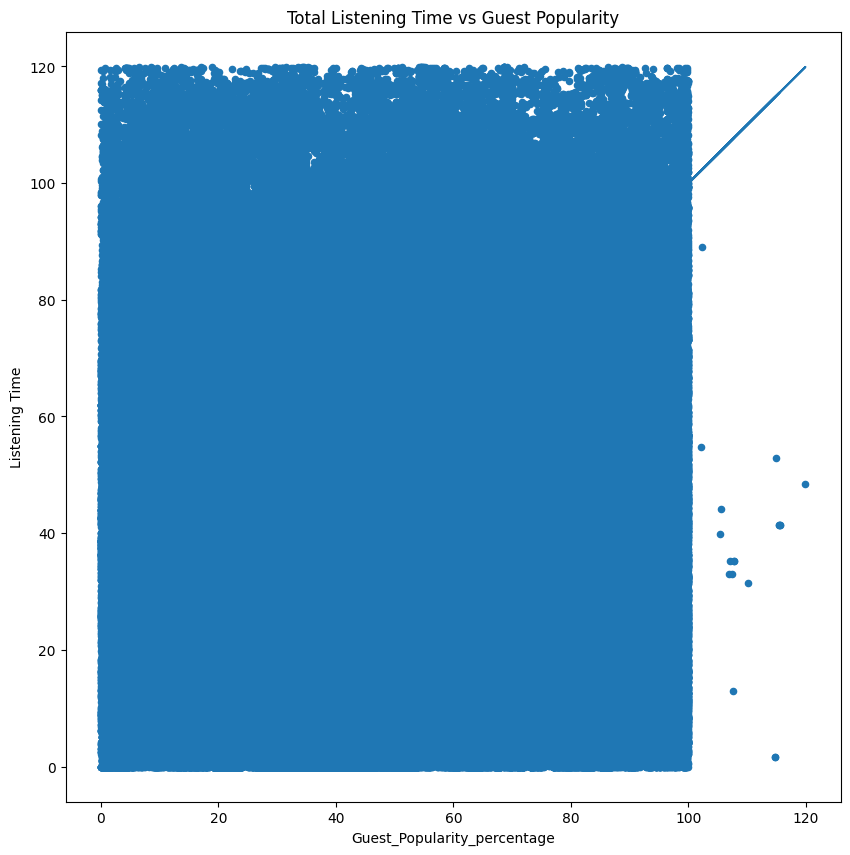

In [ ]:
#FIND A BETTER WAY TO SHOW VISUALIZATION FOR OUTLIERS HERE
#Run a Scatter Plot to check for outliers before applying mean or median fill
#plot the fitting line
plt.rcParams['agg.path.chunksize'] = 10000
df1.plot(kind = 'scatter', figsize = (10,10), x = 'Guest_Popularity_percentage', y = 'Listening_Time_minutes')
plt.title('Total Listening Time vs Guest Popularity')
plt.xlabel('Guest_Popularity_percentage')
plt.ylabel('Listening Time')

x = df1['Guest_Popularity_percentage']  # Assuming 'Episode_Length_minutes' is the x-axis
slope = 1  # Replace with the actual slope of the fitting line
intercept = 0  # Replace with the actual intercept of the fitting line

plt.plot(x, slope * x + intercept) # Plot the fitting line using the defined variables
plt.show()

# 2. DATA SPLIT

In [ ]:
#DATA SPLIT Data will now be labeled at 'train_df' and 'test_df'

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#first we load the data sets from CSV
data = pd.read_csv('train.csv')

# Split the data into training and testing sets
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)



In [ ]:
train_df.shape, test_df.shape

((600000, 12), (150000, 12))

# 2a - CLEAN and WRANGLE TRAINING SET 'train_df'

In [ ]:
train_df.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,600000.000000,530372.000000,600000.000000,483107.000000,599999.000000,600000.000000
mean,374996.602432,64.513383,59.839884,52.262489,1.348552,45.447808
std,216604.767150,32.969386,22.879048,28.441802,1.136455,27.141337
min,0.000000,1.240000,1.300000,0.000000,0.000000,0.000000
25%,187456.750000,35.780000,39.370000,28.420000,0.000000,23.186770
50%,374820.500000,63.840000,60.030000,53.620000,1.000000,43.386350
75%,562615.250000,94.070000,79.530000,76.640000,2.000000,64.825740
max,749999.000000,120.930000,119.460000,115.620000,103.750000,119.970000


In [ ]:
print(train_df['Episode_Length_minutes'].mean() + train_df['Episode_Length_minutes'].std()*3),
print(train_df['Number_of_Ads'].mean() + train_df['Number_of_Ads'].std()*3)

#Popularity data is a percentage and therefore should not be greater than 100

163.4215390780917
4.757917350270003


In [ ]:
# Outliers for Training ang Test Data sets
Episode_outliers = pd.concat([train_df['id'][train_df['Episode_Length_minutes'] > 163.42],
                              train_df['id'][train_df['Host_Popularity_percentage'] > 100],
                              train_df['id'][train_df['Guest_Popularity_percentage'] > 100],
                              train_df['id'][train_df['Number_of_Ads'] > 4.8]])
Episode_outliers.shape

(44,)

In [ ]:
#Getting rid of line row which is an outlier
train_df = train_df[~train_df['id'].isin(Episode_outliers)]

train_df.shape



(599956, 12)

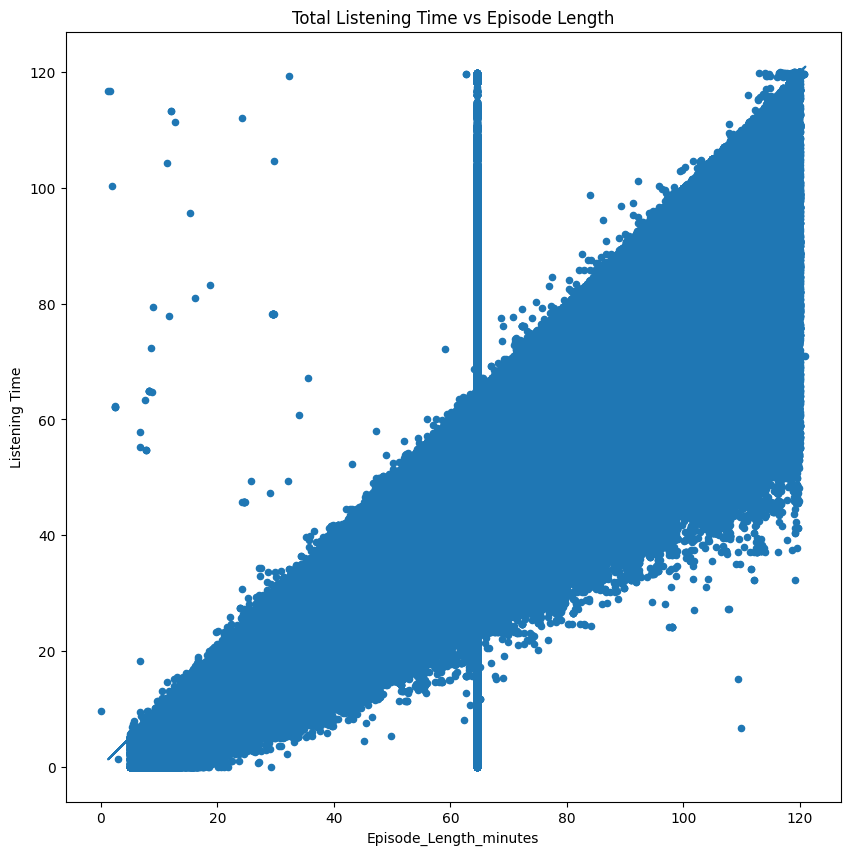

In [314]:
#Run a Scatter Plot to check for outliers before applying mean or median fill
#plot the fitting line
plt.rcParams['agg.path.chunksize'] = 10000
df1.plot(kind = 'scatter', figsize = (10,10), x = 'Episode_Length_minutes', y = 'Listening_Time_minutes')
plt.title('Total Listening Time vs Episode Length')
plt.xlabel('Episode_Length_minutes')
plt.ylabel('Listening Time')

x = train_df['Episode_Length_minutes']  # Assuming 'Episode_Length_minutes' is the x-axis
slope = 1  # Replace with the actual slope of the fitting line
intercept = 0  # Replace with the actual intercept of the fitting line

plt.plot(x, slope * x + intercept) # Plot the fitting line using the defined variables
plt.show()

In [ ]:
train_df.isnull().sum(), train_df.shape

(id                                  0
 Podcast_Name                        0
 Episode_Title                       0
 Episode_Length_minutes          69623
 Genre                               0
 Host_Popularity_percentage          0
 Publication_Day                     0
 Publication_Time                    0
 Guest_Popularity_percentage    116892
 Number_of_Ads                       1
 Episode_Sentiment                   0
 Listening_Time_minutes              0
 dtype: int64,
 (599956, 12))

In [ ]:
#column_means = train_df.mean()
#print(column_means)

average=train_df['Episode_Length_minutes'].mean()
print('Episode_Length_minutes: ',average)
average=train_df['Guest_Popularity_percentage'].mean()
print('Guest_Popularity_percentage:',average)
average=train_df['Number_of_Ads'].mean()
print('Number_of_Ads: ',average)
average=train_df['Listening_Time_minutes'].mean()
print('Listening_Time_minutes: ',average)

Episode_Length_minutes:  64.51262518605216
Guest_Popularity_percentage: 52.259968636749996
Number_of_Ads:  1.34799943329083
Listening_Time_minutes:  45.4468925390862


In [ ]:
import pandas as pd

#column_name =['Guest_Popularity_percentage','Episode_Length_minutes','Number_of_Ads']
column_avg = {'Guest_Popularity_percentage': train_df['Guest_Popularity_percentage'].mean(),
              'Episode_Length_minutes': train_df['Episode_Length_minutes'].mean(),
              'Number_of_Ads': train_df['Number_of_Ads'].mean()
              }

train_df.fillna(column_avg, inplace=True)
#pd.options.mode.copy_on_write = True

#for col in mean_column_fill:
    #df1[col] = train_df[col].fillna(average_values[col])

In [ ]:
 train_df.isnull().sum(), train_df.shape

(id                             0
 Podcast_Name                   0
 Episode_Title                  0
 Episode_Length_minutes         0
 Genre                          0
 Host_Popularity_percentage     0
 Publication_Day                0
 Publication_Time               0
 Guest_Popularity_percentage    0
 Number_of_Ads                  0
 Episode_Sentiment              0
 Listening_Time_minutes         0
 dtype: int64,
 (599956, 12))

In [ ]:
#Average percentage Listening time/Episode Length by Genre
train_df.groupby('Genre')['Listening_Time_minutes'].mean()/train_df.groupby('Genre')['Episode_Length_minutes'].mean()

,0
Genre,
Business,0.706228
Comedy,0.700414
Education,0.704692
Health,0.701635
Lifestyle,0.702465
Music,0.708082
News,0.695012
Sports,0.698466
Technology,0.712006


In [ ]:
# Select only numeric columns before calculating correlation
numeric_df = train_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                                   id  Episode_Length_minutes  \
id                           1.000000               -0.000687   
Episode_Length_minutes      -0.000687                1.000000   
Host_Popularity_percentage   0.000183                0.022134   
Guest_Popularity_percentage  0.000912               -0.008159   
Number_of_Ads                0.000401               -0.054439   
Listening_Time_minutes      -0.000654                0.865758   

                             Host_Popularity_percentage  \
id                                             0.000183   
Episode_Length_minutes                         0.022134   
Host_Popularity_percentage                     1.000000   
Guest_Popularity_percentage                    0.020103   
Number_of_Ads                                 -0.017678   
Listening_Time_minutes                         0.051762   

                             Guest_Popularity_percentage  Number_of_Ads  \
id                                              0.00091

# 2a - CLEAN and WRANGLE TEST SET 'test_df'

In [ ]:
test_df.isnull().sum(), test_df.shape

(id                                 0
 Podcast_Name                       0
 Episode_Title                      0
 Episode_Length_minutes         17465
 Genre                              0
 Host_Popularity_percentage         0
 Publication_Day                    0
 Publication_Time                   0
 Guest_Popularity_percentage    29137
 Number_of_Ads                      0
 Episode_Sentiment                  0
 Listening_Time_minutes             0
 dtype: int64,
 (150000, 12))

In [ ]:
print(test_df['Episode_Length_minutes'].mean() + test_df['Episode_Length_minutes'].std()*3),
print(test_df['Number_of_Ads'].mean() + test_df['Number_of_Ads'].std()*3)

163.38187745183149
4.974226058544685


In [ ]:
# Outliers for Training ang Test Data sets
Episode_outliers = pd.concat([test_df['id'][test_df['Episode_Length_minutes'] > 163.38],
                              test_df['id'][test_df['Host_Popularity_percentage'] > 100],
                              test_df['id'][test_df['Guest_Popularity_percentage'] > 100],
                              test_df['id'][test_df['Number_of_Ads'] > 4.97]])
Episode_outliers.shape

(10,)

In [ ]:
test_df.shape, Episode_outliers.shape

((150000, 12), (10,))

In [ ]:
#Getting rid of line row which is an outlier
test_df = test_df[~test_df['id'].isin(Episode_outliers)]

test_df.shape



(149990, 12)

In [ ]:
test_df.isnull().sum(), test_df.shape

(id                                 0
 Podcast_Name                       0
 Episode_Title                      0
 Episode_Length_minutes         17464
 Genre                              0
 Host_Popularity_percentage         0
 Publication_Day                    0
 Publication_Time                   0
 Guest_Popularity_percentage    29136
 Number_of_Ads                      0
 Episode_Sentiment                  0
 Listening_Time_minutes             0
 dtype: int64,
 (149990, 12))

In [ ]:
#column_means = df1_transformed.mean()
#print(column_means)

average=test_df['Episode_Length_minutes'].mean()
print('Episode_Length_minutes: ',average)
average=test_df['Guest_Popularity_percentage'].mean()
print('Guest_Popularity_percentage:',average)
average=test_df['Number_of_Ads'].mean()

Episode_Length_minutes:  64.46676481033093
Guest_Popularity_percentage: 52.13215543548413


In [ ]:
import pandas as pd

#column_name =['Guest_Popularity_percentage','Episode_Length_minutes','Number_of_Ads']
column_avg = {'Guest_Popularity_percentage': test_df['Guest_Popularity_percentage'].mean(),
              'Episode_Length_minutes': test_df['Episode_Length_minutes'].mean()
              }

test_df.fillna(column_avg, inplace=True)
#pd.options.mode.copy_on_write = True

#for col in mean_column_fill:
    #df1[col] = train_df[col].fillna(average_values[col])

In [ ]:
test_df.isnull().sum(), test_df.shape

(id                             0
 Podcast_Name                   0
 Episode_Title                  0
 Episode_Length_minutes         0
 Genre                          0
 Host_Popularity_percentage     0
 Publication_Day                0
 Publication_Time               0
 Guest_Popularity_percentage    0
 Number_of_Ads                  0
 Episode_Sentiment              0
 Listening_Time_minutes         0
 dtype: int64,
 (149990, 12))

In [320]:
#Average percentage Listening time/Length by Genre
train_df.groupby('Genre')['Listening_Time_minutes'].mean()/train_df.groupby('Genre')['Episode_Length_minutes'].mean()

,0
Genre,
Business,0.706228
Comedy,0.700414
Education,0.704692
Health,0.701635
Lifestyle,0.702465
Music,0.708082
News,0.695012
Sports,0.698466
Technology,0.712006


In [319]:
train_df.groupby('Genre')['Listening_Time_minutes'].mean(),train_df.groupby('Genre')['Episode_Length_minutes'].mean()

(Genre
 Business      45.588566
 Comedy        44.385242
 Education     45.781153
 Health        45.769223
 Lifestyle     45.517474
 Music         46.622458
 News          44.385304
 Sports        44.947253
 Technology    45.612079
 True Crime    46.071125
 Name: Listening_Time_minutes, dtype: float64,
 Genre
 Business      64.552196
 Comedy        63.370038
 Education     64.966180
 Health        65.232285
 Lifestyle     64.796778
 Music         65.843291
 News          63.862648
 Sports        64.351341
 Technology    64.061398
 True Crime    64.555332
 Name: Episode_Length_minutes, dtype: float64)

In [322]:
train_df.groupby('Episode_Sentiment')['Number_of_Ads'].mean()

,Number_of_Ads
Episode_Sentiment,
Negative,1.369685
Neutral,1.360184
Positive,1.313909


In [ ]:
test_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
404846,404846,Daily Digest,Episode 74,46.590000,News,58.43,Wednesday,Night,81.920000,2.0,Positive,20.91979
580313,580313,Joke Junction,Episode 30,45.370000,Comedy,76.57,Wednesday,Night,45.790000,0.0,Positive,42.66054
552086,552086,Business Briefs,Episode 16,54.670000,Business,96.00,Saturday,Afternoon,52.132155,3.0,Positive,43.30069
370876,370876,Brain Boost,Episode 31,61.760000,Education,69.57,Sunday,Morning,17.080000,1.0,Positive,48.56000
239330,239330,Humor Hub,Episode 15,64.466765,Comedy,79.20,Saturday,Morning,21.310000,0.0,Positive,48.53842


In [ ]:
# Select only numeric columns before calculating correlation
numeric_df = test_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                                   id  Episode_Length_minutes  \
id                           1.000000                0.000161   
Episode_Length_minutes       0.000161                1.000000   
Host_Popularity_percentage   0.000802                0.022160   
Guest_Popularity_percentage -0.000694               -0.008524   
Number_of_Ads               -0.000374               -0.056586   
Listening_Time_minutes      -0.001816                0.867260   

                             Host_Popularity_percentage  \
id                                             0.000802   
Episode_Length_minutes                         0.022160   
Host_Popularity_percentage                     1.000000   
Guest_Popularity_percentage                    0.019963   
Number_of_Ads                                 -0.018353   
Listening_Time_minutes                         0.047038   

                             Guest_Popularity_percentage  Number_of_Ads  \
id                                             -0.00069

# 3. Preprocessing and Encoding

In [ ]:
#Create encoder
#(choose columns, encoder type, fit the data, merge encoded columns to cleaned data)


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

categorical_cols = ['Episode_Sentiment', 'Genre', 'Publication_Day', 'Publication_Time']

#creating OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#Fit and Transform cat columns
encoded_data = encoder.fit_transform(train_df[categorical_cols])

#Get feature names for encoded columns
encoded_cols = encoder.get_feature_names_out(categorical_cols)

#Create a DataFrame from encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols,index=train_df.index)

#Concat the encoded DF with original DF
train_df_transformed = pd.concat([train_df.drop(columns=categorical_cols), encoded_df], axis=1)

In [ ]:
train_df_transformed.shape

(599956, 32)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

categorical_cols = ['Episode_Sentiment', 'Genre', 'Publication_Day', 'Publication_Time']

#creating OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#Fit and Transform cat columns
encoded_data = encoder.fit_transform(test_df[categorical_cols])

#Get feature names for encoded columns
encoded_cols = encoder.get_feature_names_out(categorical_cols)

#Create a DataFrame from encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols,index=test_df.index)

#Concat the encoded DF with original DF
test_df_transformed = pd.concat([test_df.drop(columns=categorical_cols), encoded_df], axis=1)

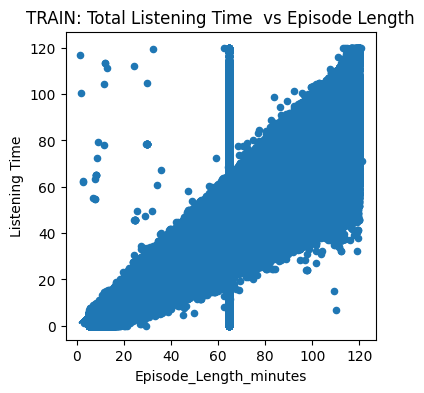

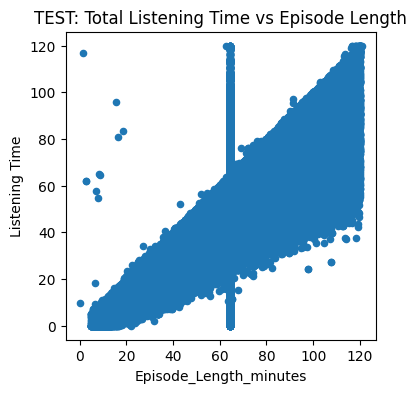

In [ ]:
#Run a Scatter Plot to check for outliers before applying mean or median fill
#plot the fitting line
plt.rcParams['agg.path.chunksize'] = 10000
train_df_transformed.plot(kind = 'scatter', figsize = (4,4), x = 'Episode_Length_minutes', y = 'Listening_Time_minutes')
plt.title('TRAIN: Total Listening Time  vs Episode Length')
plt.xlabel('Episode_Length_minutes')
plt.ylabel('Listening Time')

x = train_df_transformed['Episode_Length_minutes']  # Assuming 'Episode_Length_minutes' is the x-axis


plt.plot(x, slope * x + intercept) # Plot the fitting line using the defined variables
plt.rcParams['agg.path.chunksize'] = 10000
test_df_transformed.plot(kind = 'scatter', figsize = (4,4), x = 'Episode_Length_minutes', y = 'Listening_Time_minutes')
plt.title('TEST: Total Listening Time vs Episode Length')
plt.xlabel('Episode_Length_minutes')
plt.ylabel('Listening Time')

x = test_df_transformed['Episode_Length_minutes']  # Assuming 'Episode_Length_minutes' is the x-axis
plt.show()

In [ ]:
test_df_transformed.shape

(149990, 32)

In [ ]:
train_df_transformed.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,...,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
453635,453635,True Crime Stories,Episode 81,94.300000,97.67,52.259969,2.0,77.27788,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11651,11651,Learning Lab,Episode 53,82.150000,94.78,52.259969,1.0,50.02839,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
431999,431999,Tech Trends,Episode 21,13.720000,68.60,65.770000,3.0,10.07496,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
529211,529211,Laugh Line,Episode 99,24.000000,42.14,41.290000,0.0,17.82074,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
110925,110925,Athlete's Arena,Episode 15,64.512625,34.10,52.259969,0.0,94.80341,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test_df_transformed.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,...,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
404846,404846,Daily Digest,Episode 74,46.590000,58.43,81.920000,2.0,20.91979,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
580313,580313,Joke Junction,Episode 30,45.370000,76.57,45.790000,0.0,42.66054,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
552086,552086,Business Briefs,Episode 16,54.670000,96.00,52.132155,3.0,43.30069,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
370876,370876,Brain Boost,Episode 31,61.760000,69.57,17.080000,1.0,48.56000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
239330,239330,Humor Hub,Episode 15,64.466765,79.20,21.310000,0.0,48.53842,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#As seen below the encoding did not bring value and without defined units could not add clarity to our final Regression formula

test_df['Listening_Time_minutes']=0
#Separate features
X_train = train_df_transformed.drop(columns= ['id','Podcast_Name', 'Episode_Title','Listening_Time_minutes'])
y_train = train_df_transformed['Listening_Time_minutes']

x_test = test_df_transformed.drop(columns= ['id', 'Podcast_Name','Episode_Title','Listening_Time_minutes'])
y_test = test_df_transformed['Listening_Time_minutes']

#Run the LR model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(x_test)

#Evaluate model
print(f'test: {model.score(X_train, y_train)}', f'train: {model.score(x_test, y_test)}')
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

#Checking coefficient
coeff = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})

print('\nModel Coefficients:')
print(coeff)

test: 0.7570834286065347 train: 0.7591046697998989
Mean Squared Error: 177.2403662268957
R-squared: 0.7591046697998989
Root Mean Squared Error: 13.313165146834756

Model Coefficients:
                        Feature  Coefficient
0        Episode_Length_minutes     0.753404
1    Host_Popularity_percentage     0.037183
2   Guest_Popularity_percentage    -0.007658
3                 Number_of_Ads    -1.857767
4    Episode_Sentiment_Negative    -0.363654
5     Episode_Sentiment_Neutral    -0.359673
6    Episode_Sentiment_Positive     0.723327
7                Genre_Business     0.132780
8                  Genre_Comedy    -0.262139
9               Genre_Education     0.072499
10                 Genre_Health    -0.146589
11              Genre_Lifestyle    -0.196403
12                  Genre_Music     0.124492
13                   Genre_News    -0.482455
14                 Genre_Sports    -0.318747
15             Genre_Technology     0.521770
16             Genre_True Crime     0.554791
17    

# 4. Select and Train Model

<h> MULTIPLE LINEAR REGRESSION WITH TRAINING DATA SET</h>


What are the real world applications? Monetization: Consulting, Entrepreneurs and social media influencers.

In [ ]:
#Multiple Linear Regression would be a great method for seeing what independent variables affect our dependent variable.
#Define the independent and dependent variables
xMLR = train_df_transformed[['id','Episode_Sentiment_Negative', 'Episode_Sentiment_Neutral',
       'Episode_Sentiment_Positive', 'Genre_Business', 'Genre_Comedy',
       'Genre_Education', 'Genre_Health', 'Genre_Lifestyle', 'Genre_Music',
       'Genre_News', 'Genre_Sports', 'Genre_Technology', 'Genre_True Crime',
       'Publication_Day_Friday', 'Publication_Day_Monday',
       'Publication_Day_Saturday', 'Publication_Day_Sunday',
       'Publication_Day_Thursday', 'Publication_Day_Tuesday',
       'Publication_Day_Wednesday', 'Publication_Time_Afternoon',
       'Publication_Time_Evening', 'Publication_Time_Morning',
       'Publication_Time_Night', 'Guest_Popularity_percentage',
       'Host_Popularity_percentage',
       'Number_of_Ads', 'Episode_Length_minutes']]
yMLR = train_df_transformed['Listening_Time_minutes']

In [ ]:
mlregression = LinearRegression()
mlregression.fit(xMLR, yMLR) #Fit using the X and Y value that is being defined and created

LinearRegression()

In [ ]:
#to print to coefficient and intercept

print(mlregression.coef_)
print(mlregression.intercept_)

[-8.29759768e-09 -3.63650743e-01 -3.59677306e-01  7.23328049e-01
  1.32792391e-01 -2.62128664e-01  7.24943870e-02 -1.46581813e-01
 -1.96407744e-01  1.24497315e-01 -4.82466969e-01 -3.18758777e-01
  5.21777829e-01  5.54782045e-01  5.11420789e-02  6.84447740e-02
  1.79281042e-01 -2.29831235e-01 -6.14707559e-03 -1.14817409e-01
  5.19278251e-02 -3.44489542e-02 -2.10749142e-01  2.26094229e-02
  2.22588673e-01 -7.65778293e-03  3.71830510e-02 -1.85776597e+00
  7.53403637e-01]
-2.4820425542781095


In [ ]:
mlregression.intercept_

np.float64(-2.4820425542781095)

In [ ]:
#Multiple Linear Regression would be a great method for seeing what independent variables affect our dependent variable.
#Define the independent and dependent variables
x1MLR = train_df[['Guest_Popularity_percentage',
       'Host_Popularity_percentage','Number_of_Ads', 'Episode_Length_minutes']]
y1MLR = train_df['Listening_Time_minutes']

In [ ]:
mlregression = LinearRegression()
mlregression.fit(x1MLR, y1MLR) #Fit using the X and Y value that is being defined and created

LinearRegression()

In [ ]:
#to print to coefficient and intercept
print(mlregression.coef_)
print(mlregression.intercept_)

[-0.00766826  0.03736943 -1.87121191  0.75373425]
-2.491462503994036


# TEST FOR MULTICOLLINEARITY

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

desired_columns = ['Episode_Length_minutes','Guest_Popularity_percentage',
       'Host_Popularity_percentage','Number_of_Ads','Episode_Sentiment_Negative', 'Episode_Sentiment_Neutral',
       'Episode_Sentiment_Positive']

numerical_features = train_df_transformed[desired_columns]

vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]

print(vif_data)



                       Feature       VIF
0       Episode_Length_minutes  1.004210
1  Guest_Popularity_percentage  1.000578
2   Host_Popularity_percentage  1.001233
3                Number_of_Ads  1.003737
4   Episode_Sentiment_Negative  6.565754
5    Episode_Sentiment_Neutral  6.656502
6   Episode_Sentiment_Positive  6.611262


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

#Separate features
x_train = train_df_transformed.drop(columns= ['id', 'Podcast_Name', 'Episode_Title', 'Listening_Time_minutes'])
y_train = train_df_transformed['Listening_Time_minutes']

x_test = test_df_transformed.drop(columns= ['id', 'Podcast_Name', 'Episode_Title', 'Listening_Time_minutes'])
y_test = test_df_transformed['Listening_Time_minutes']

#Run the LR model
ridger = Ridge(alpha=50, max_iter=100, tol=0.1)
ridger.fit(x_train, y_train)

#check accuracy
ridger.score(x_train, y_train), ridger.score(x_test, y_test)


(0.7570834284529401, 0.7591047378895003)

In [ ]:
#Make predictions
y_pred = ridger1.predict(x_test)

#Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')
#Checking coefficient
coeff = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': ridger.coef_})
slope = ridger.coef_[0]
print('\nModel Coefficients:')
print(f'Slope is: {slope}')
print(coeff)


Mean Squared Error: 177.24031612951157
R-squared: 0.7591047378895003
Root Mean Squared Error: 13.313163265336739

Model Coefficients:
Slope is: 0.7534039652663974
                        Feature  Coefficient
0        Episode_Length_minutes     0.753404
1    Host_Popularity_percentage     0.037183
2   Guest_Popularity_percentage    -0.007658
3                 Number_of_Ads    -1.857645
4    Episode_Sentiment_Negative    -0.363566
5     Episode_Sentiment_Neutral    -0.359587
6    Episode_Sentiment_Positive     0.723153
7                Genre_Business     0.132668
8                  Genre_Comedy    -0.261936
9               Genre_Education     0.072395
10                 Genre_Health    -0.146475
11              Genre_Lifestyle    -0.196257
12                  Genre_Music     0.124366
13                   Genre_News    -0.481998
14                 Genre_Sports    -0.318527
15             Genre_Technology     0.521385
16             Genre_True Crime     0.554380
17       Publication_Day_Fr

In [ ]:
from sklearn.linear_model import Lasso

#Separate features
x_train = train_df_transformed.drop(columns= ['id', 'Podcast_Name','Episode_Title', 'Listening_Time_minutes'])
y_train = train_df_transformed['Listening_Time_minutes']

x_test = test_df_transformed.drop(columns= ['id', 'Podcast_Name', 'Episode_Title', 'Listening_Time_minutes'])
y_test = test_df_transformed['Listening_Time_minutes']

#Run the LR model
Lassor = Lasso(alpha=50, max_iter=100, tol=0.1)
Lassor.fit(x_train, y_train)

#check accuracy
Lassor.score(x_train, y_train), Lassor.score(x_test, y_test)


(0.7460049626738708, 0.7484427246331997)

In [ ]:
#Make predictions
y_pred = Lassor.predict(x_test)

#Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')
#Checking coefficient
coeff = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': Lassor.coef_})

print('\nModel Coefficients:')
print(coeff)

Mean Squared Error: 185.08496439518373
R-squared: 0.7484427246331997
Root Mean Squared Error: 13.604593503489317

Model Coefficients:
                        Feature  Coefficient
0        Episode_Length_minutes     0.706009
1    Host_Popularity_percentage     0.000000
2   Guest_Popularity_percentage    -0.000000
3                 Number_of_Ads    -0.000000
4    Episode_Sentiment_Negative    -0.000000
5     Episode_Sentiment_Neutral    -0.000000
6    Episode_Sentiment_Positive     0.000000
7                Genre_Business     0.000000
8                  Genre_Comedy    -0.000000
9               Genre_Education     0.000000
10                 Genre_Health    -0.000000
11              Genre_Lifestyle    -0.000000
12                  Genre_Music     0.000000
13                   Genre_News    -0.000000
14                 Genre_Sports    -0.000000
15             Genre_Technology     0.000000
16             Genre_True Crime     0.000000
17       Publication_Day_Friday     0.000000
18       Pu

# Cross Validation

In [302]:
df1.shape

(750000, 12)

In [303]:
print(df1['Episode_Length_minutes'].mean() + df1['Episode_Length_minutes'].std()*3),
print(df1['Number_of_Ads'].mean() + df1['Number_of_Ads'].std()*3)

163.41354853795013
4.802246084682533


In [304]:
df1Episode_outliers = pd.concat([df1['id'][df1['Episode_Length_minutes'] > 163.42],
                              df1['id'][df1['Host_Popularity_percentage'] > 100],
                              df1['id'][df1['Guest_Popularity_percentage'] > 100],
                              df1['id'][df1['Number_of_Ads'] > 4.8]])

In [305]:
df1 = df1[~df1['id'].isin(df1Episode_outliers)]


In [306]:
column_avg = {'Guest_Popularity_percentage': df1['Guest_Popularity_percentage'].mean(),
              'Episode_Length_minutes': df1['Episode_Length_minutes'].mean(),
              'Number_of_Ads': df1['Number_of_Ads'].mean()
              }
df1.fillna(column_avg, inplace=True)

In [307]:
categorical_cols = ['Episode_Sentiment', 'Genre', 'Publication_Day', 'Publication_Time']

#creating OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#Fit and Transform cat columns
encoded_data = encoder.fit_transform(df1[categorical_cols])

#Get feature names for encoded columns
encoded_cols = encoder.get_feature_names_out(categorical_cols)

#Create a DataFrame from encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols,index=df1.index)

#Concat the encoded DF with original DF
df1 = pd.concat([df1.drop(columns=categorical_cols), encoded_df], axis=1)

In [308]:
X= df1.drop(columns= ['id', 'Podcast_Name','Episode_Title', 'Listening_Time_minutes'])
y= df1['Listening_Time_minutes']

In [309]:
df1.shape

(749946, 32)

In [313]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# Models to compare
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression()
}

# Evaluate each model with 5-fold cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}:")
    print(f"  Accuracy Scores: {scores}")
    print(f"  Average Accuracy: {scores.mean():.3f}")
    print("-" * 40)


Ridge:
  Accuracy Scores: [0.75519219 0.75565677 0.7588885  0.75960461 0.75801028]
  Average Accuracy: 0.757
----------------------------------------
Lasso:
  Accuracy Scores: [0.75365898 0.75400549 0.7572801  0.75775049 0.75641132]
  Average Accuracy: 0.756
----------------------------------------
LinearRegression:
  Accuracy Scores: [0.75519219 0.75565677 0.7588885  0.75960461 0.75801028]
  Average Accuracy: 0.757
----------------------------------------
